<a href="https://colab.research.google.com/github/Parinitha-M-Samaga/DL/blob/main/Hiragana_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset:** http://etlcdb.db.aist.go.jp/obtaining-etl-character-database ETL8G.zip <br>
**Problem Statement:** To build a CNN Model that recognises Japanese characters.



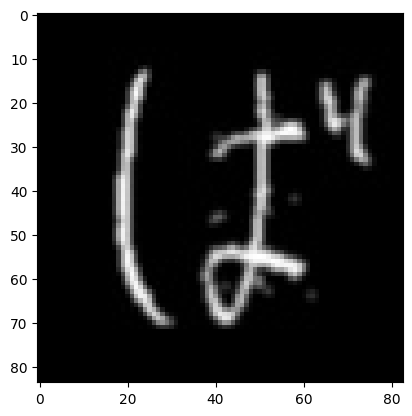

In [ ]:
#100% data for training
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2 as cv

image = cv.imread("/content/kanaA0.jpg",)
image2 = cv.imread("/content/kanaBA0.jpg",)
image3 = cv.imread("/content/kanaCHI0.jpg",)
image4 = cv.imread("/content/kanaDA0.jpg",)
image5 = cv.imread("/content/kanaE0.jpg",)

image11 = cv.imread("/content/kanaA2.jpg",)
image12 = cv.imread("/content/kanaBA2.jpg",)
image13 = cv.imread("/content/kanaCHI2.jpg",)
image14 = cv.imread("/content/kanaDA2.jpg",)
image15 = cv.imread("/content/kanaE2.jpg",)


plt.imshow(image2)

In [ ]:
'''from keras.utils import to_categorical
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(60000, 28,28,1)
test_images = test_images.reshape(10000, 28,28,1)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)'''

'from keras.utils import to_categorical\nfrom keras.datasets import mnist\n(train_images, train_labels), (test_images, test_labels) = mnist.load_data()\ntrain_images = train_images.reshape(60000, 28,28,1)\ntest_images = test_images.reshape(10000, 28,28,1)\ntrain_labels = to_categorical(train_labels)\ntest_labels = to_categorical(test_labels)'

In [ ]:
import numpy as np
train_images = [image,image2,image3,image4,image5,image11,image12,image13,image14,image15]
train_images = np.array(train_images)
image6 = cv.imread("/content/kanaA1.jpg")
image7 = cv.imread("/content/kanaBA1.jpg")
image8 = cv.imread("/content/kanaCHI1.jpg")
image9 = cv.imread("/content/kanaDA1.jpg")
image10 = cv.imread("/content/kanaE1.jpg")
test_images = [image6,image7,image8,image9,image10]
test_images = np.array(test_images)
train_images = train_images.reshape(10, 84,83,3)
test_images = test_images.reshape(5, 84,83,3)

In [ ]:
np.array(image5).shape
print(test_labels.shape)

(5, 5)


In [ ]:
from keras.utils import to_categorical
class_labels = ['0','1','2','3','4','0','1','2','3','4']
class_labels = np.array(class_labels)
class_labels = to_categorical(class_labels)
train_labels = class_labels
train_labels.shape
test_labels = ['0','1','2','3','4']
test_labels = np.array(test_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(84, (3, 3), activation='relu', input_shape=(84, 83, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 82, 81, 84)        2352      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 41, 40, 84)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 39, 38, 64)        48448     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 19, 19, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 17, 17, 64)        36928     
                                                                 
Total params: 87728 (342.69 KB)
Trainable params: 8772

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 82, 81, 84)        2352      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 41, 40, 84)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 39, 38, 64)        48448     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 19, 19, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 17, 17, 64)        36928     
                                                                 
 flatten_2 (Flatten)         (None, 18496)            

In [ ]:
import tensorflow as tf

model.compile(loss='categorical_crossentropy',
optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01, epsilon=0.01), metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs=100, validation_data=(test_images,test_labels))

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 18.5068 - val_accuracy: 0.8000
Epoch 2/100
1/1 [==============================] - 0s 237ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 18.5068 - val_accuracy: 0.8000
Epoch 3/100
1/1 [==============================] - 0s 250ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 18.5068 - val_accuracy: 0.8000
Epoch 4/100
1/1 [==============================] - 0s 243ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 18.5068 - val_accuracy: 0.8000
Epoch 5/100
1/1 [==============================] - 0s 246ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 18.5068 - val_accuracy: 0.8000
Epoch 6/100
1/1 [==============================] - 0s 219ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 18.5068 - val_accuracy: 0.8000
Epoch 7/100
1/1 [==============================] - 0s 235ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 18.5068 - va

In [ ]:
predict_val = image5.reshape(1,84,83,3)
ans = model.predict(predict_val)
ans

1/1 [==============================] - 0s 84ms/step


array([[3.5606677e-13, 1.3727558e-11, 3.2741980e-12, 3.4083459e-22,
        1.0000000e+00]], dtype=float32)

In [ ]:
model.evaluate(test_images,test_labels)

1/1 [==============================] - 0s 50ms/step - loss: 0.6658 - accuracy: 0.8000


[0.6658282279968262, 0.800000011920929]